In [560]:
#knn

In [561]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [562]:
 k = 3

In [563]:
data = np.array(((5.9,3.0),
(4.6,3.0),
(6.2,2.8),
(4.7,3.2),
(5.5,4.2),
(5.0,3.0),
(4.9,3.1),
(6.7,3.0),
(5.2,3.8),
(6.0,3.0),))

In [564]:
x = data[:,0]
y = data[:,1]

In [565]:
m1 = (6.2,3.2)
m2 = (6.6,3.7)
m3 = (6.5,3.0)

In [566]:
def dist(x1, x2, y1, y2):
    return sqrt((x1 - x2)**2 + (y1 - y2)**2)

# calculates distance from each point of each centroid
def cross_distance(data,m1,m2,m3):
    rows = data.shape[0]
    results = np.zeros(rows*3).reshape(rows,3)
    for i in range(rows):
        results[i:,0] = (dist(x[i], m1[0], y[i], m1[1]))
        results[i:,1] = (dist(x[i], m2[0], y[i], m2[1]))
        results[i:,2] = (dist(x[i], m3[0], y[i], m3[1]))
    return results

# gets the neighboorhoods
def get_neighborhood(data, results):
    min_cols = np.argmin(results, axis=1)
    min_cols
    c1 = data[(min_cols == 0)]
    c2 = data[(min_cols == 1)]
    c3 = data[(min_cols == 2)]    
    return c1, c2, c3


# gets new centroids
def local_centroids(c1,c2,c3):
    m1 = (1/len(c1)*sum(c1[:,0]) , 1/len(c1)*sum(c1[:,1]))
    m2 = (1/len(c2)*sum(c2[:,0]) , 1/len(c2)*sum(c2[:,1]))
    m3 = (1/len(c3)*sum(c3[:,0]) , 1/len(c3)*sum(c3[:,1]))
    return m1,m2,m3

In [567]:
for i in range(4):
    results = cross_distance(data,m1,m2,m3)
    c1,c2,c3 = get_neighborhood(data,results)
    m1,m2,m3 = local_centroids(c1,c2,c3)


In [573]:
c1,c2,c3

(array([[4.6, 3. ],
        [4.7, 3.2],
        [5. , 3. ],
        [4.9, 3.1]]),
 array([[5.5, 4.2],
        [5.2, 3.8]]),
 array([[5.9, 3. ],
        [6.2, 2.8],
        [6.7, 3. ],
        [6. , 3. ]]))

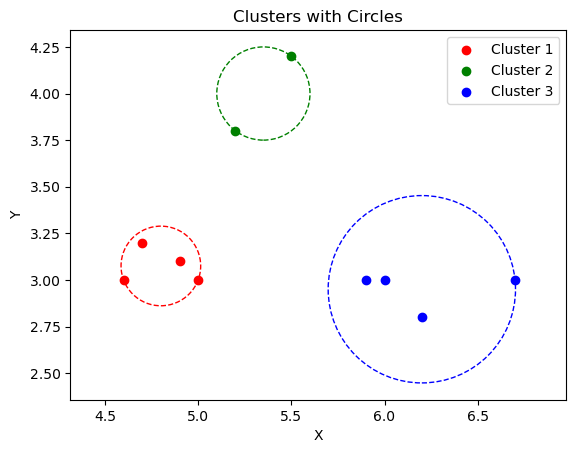

In [571]:
def plot_clusters(c1, c2, c3):
    plt.scatter(c1[:, 0], c1[:, 1], color='red', label='Cluster 1')
    plt.scatter(c2[:, 0], c2[:, 1], color='green', label='Cluster 2')
    plt.scatter(c3[:, 0], c3[:, 1], color='blue', label='Cluster 3')
    
    # Calculate circle parameters for each cluster
    c1_center = np.mean(c1, axis=0)
    c1_radius = np.max(np.linalg.norm(c1 - c1_center, axis=1))
    
    c2_center = np.mean(c2, axis=0)
    c2_radius = np.max(np.linalg.norm(c2 - c2_center, axis=1))
    
    c3_center = np.mean(c3, axis=0)
    c3_radius = np.max(np.linalg.norm(c3 - c3_center, axis=1))
    
    # Plot circles
    circle1 = plt.Circle(c1_center, c1_radius, color='red', fill=False, linestyle='--')
    circle2 = plt.Circle(c2_center, c2_radius, color='green', fill=False, linestyle='--')
    circle3 = plt.Circle(c3_center, c3_radius, color='blue', fill=False, linestyle='--')
    
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters with Circles')
    plt.legend()
    plt.axis('equal')  # Ensure aspect ratio is equal for circles
    plt.show()
plot_clusters(c1, c2, c3)